## This code is to find out the different of each epoch and batch size combination

In [66]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [67]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/resnet18/fashion_mnist/'
data_path2 = parent_path / 'Data/resnet18/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet18/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet18/cifar100


### extract data

In [68]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [69]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R0'] ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0'] ['E20_B256_R0']


### analysis data

#### find the data in same epoch and batch size

In [70]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet18/fashion_mnist/E20_B256_R0 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet18/cifar100/E20_B256_R0
The files are: ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [71]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [72]:
LayersName = ['S0_C0', 'S0_B1', 'S0_R2', 'S0_M3', 'S1_R0', 'S1_R1', 'S2_R0', 'S2_R1', 'S3_R0', 'S3_R1', 'S4_R0', 'S4_R1', 'A5', 'F6', 'L7']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 15


##### fashionMNIST

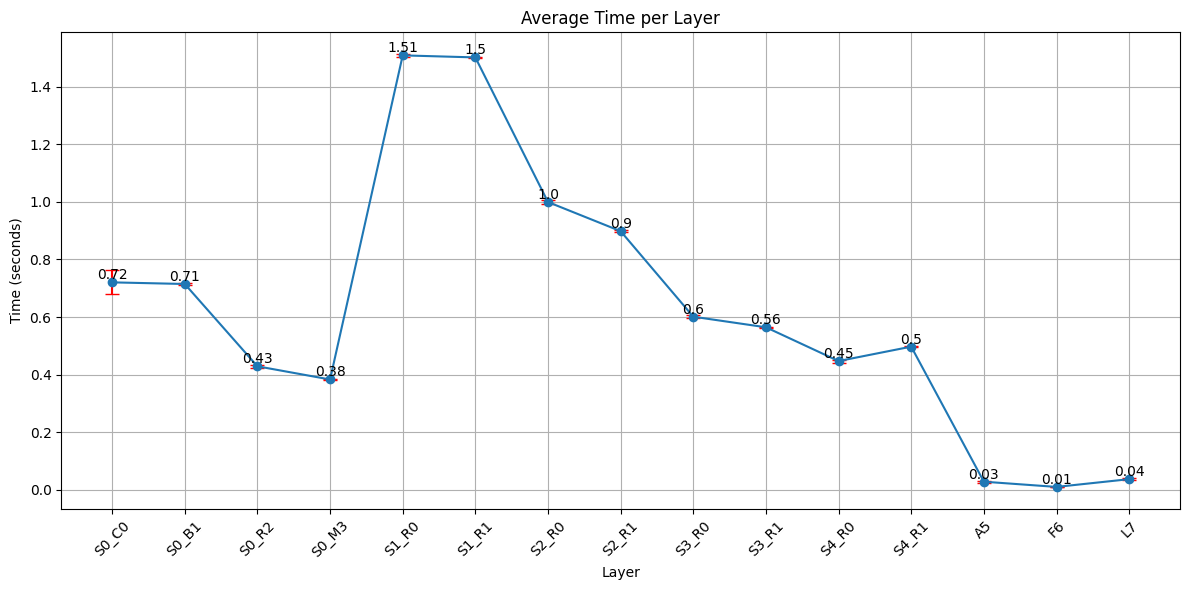

In [73]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [74]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'R' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock[1:]
IncepBlockIndex = IncepBlockIndex[1:]
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S1_R0', 'S1_R1', 'S2_R0', 'S2_R1', 'S3_R0', 'S3_R1', 'S4_R0', 'S4_R1']
The inception block indexes are [4, 5, 6, 7, 8, 9, 10, 11]


In [75]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[1.52457786 1.49966431 1.50746822 1.50808167 1.5054028  1.50550365
  1.50909114 1.5065949  1.50722718 1.50744987 1.51039529 1.50623798
  1.5096705  1.50760126 1.50751805 1.50938916 1.51023173 1.51364756
  1.5099082  1.50124574]
 [1.49858499 1.49632931 1.50619054 1.50138712 1.49927306 1.49944234
  1.50563049 1.50196505 1.49977851 1.50034571 1.50314975 1.50020504
  1.50365448 1.49982548 1.50085378 1.50283837 1.50191712 1.5036521
  1.50161028 1.49803877]
 [1.02069783 0.99383855 1.0002501  0.99806499 0.99590969 0.99562573
  1.0013361  0.99846148 0.99727988 0.99799824 0.99960208 0.99667001
  1.00241828 0.99683428 0.99760461 0.99747133 1.00042653 1.00012946
  1.00008678 0.99400592]
 [0.89421749 0.8934021  0.9047823  0.89733768 0.89613581 0.89825964
  0.90018725 0.89844012 0.89742994 0.89718461 0.90058398 0.89703584
  0.90170574 0.89646912 0.89700866 0.89669085 0.90111804 0.90117335
  0.8980453  0.89465523]
 [0.62084579 0.59478855 0.60645342 0.59845209 0.59730601 0.5983

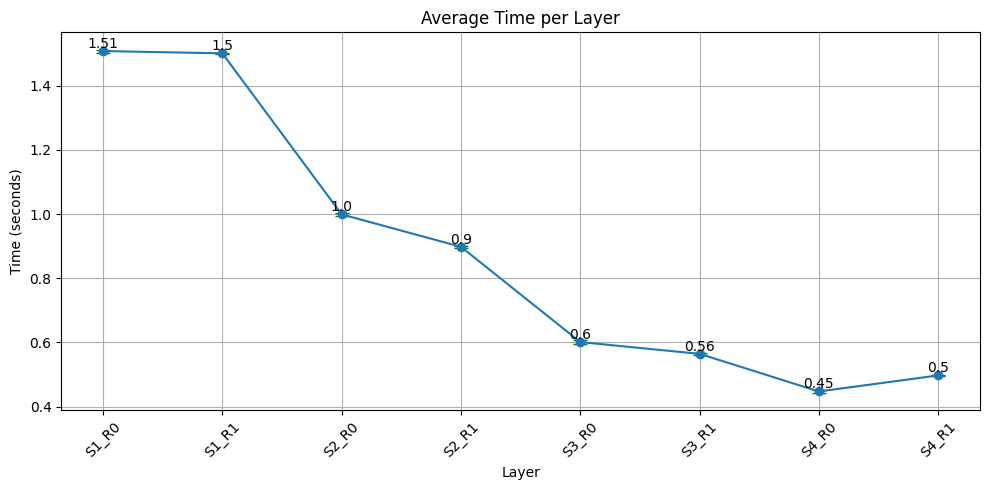

In [76]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

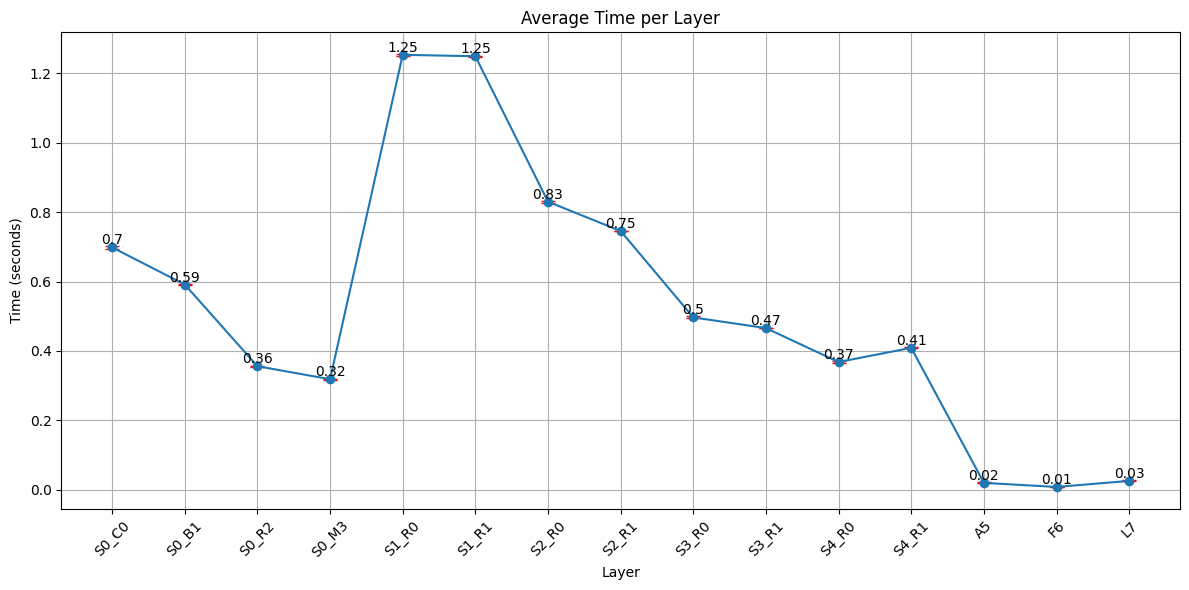

In [77]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [78]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'R' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock[1:]
IncepBlockIndex = IncepBlockIndex[1:]
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S1_R0', 'S1_R1', 'S2_R0', 'S2_R1', 'S3_R0', 'S3_R1', 'S4_R0', 'S4_R1']
The inception block indexes are [4, 5, 6, 7, 8, 9, 10, 11]


In [79]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[1.2598412  1.25250363 1.25247002 1.25188541 1.25142574 1.25346446
  1.25234509 1.25349784 1.25375867 1.25227284 1.25498724 1.25017762
  1.25887656 1.25410438 1.25675058 1.25394607 1.25486088 1.25245047
  1.25491881 1.25389552]
 [1.25362754 1.24847221 1.24831557 1.24836898 1.24786639 1.24941254
  1.24775934 1.24928927 1.24939466 1.24821639 1.25076723 1.2465148
  1.25469589 1.25001574 1.25306392 1.2497797  1.25043797 1.24867153
  1.25051212 1.24981904]
 [0.8409822  0.82861209 0.82798553 0.82831979 0.82788563 0.82863593
  0.82925725 0.82906771 0.82915521 0.82791376 0.83051443 0.82591534
  0.83564067 0.83171892 0.8312571  0.82948947 0.83038425 0.82828617
  0.82998657 0.83202052]
 [0.74607539 0.74523139 0.74452376 0.74483299 0.74465728 0.74556088
  0.74446297 0.74522114 0.74573374 0.74469566 0.74727464 0.7429862
  0.74756908 0.74635124 0.74855733 0.7469573  0.74695444 0.74543047
  0.74654794 0.74621224]
 [0.50783062 0.49552298 0.49486828 0.49507546 0.49498725 0.49579

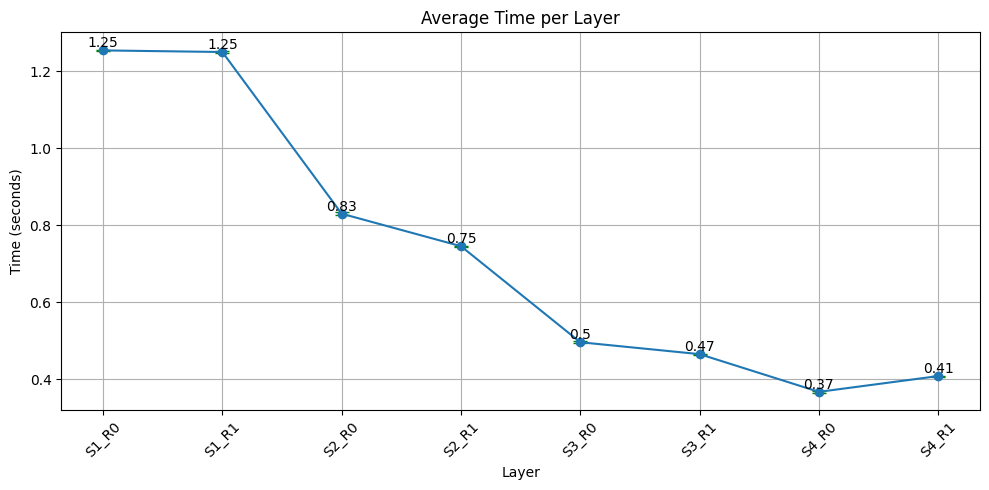

In [80]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [81]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

##### fashionMNIST

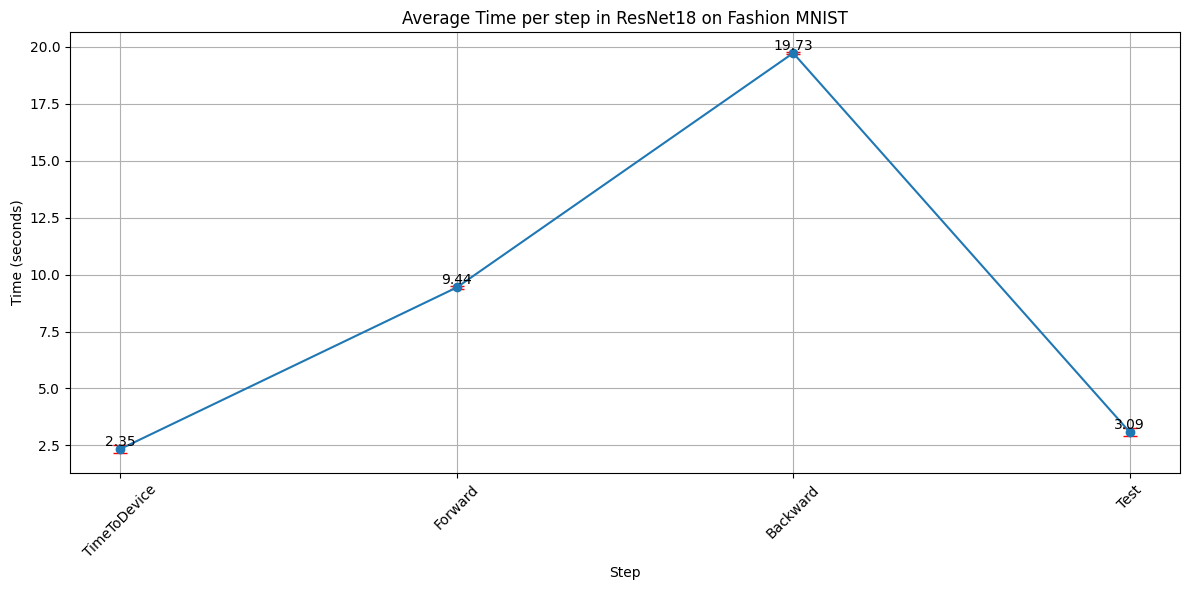

In [82]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per step in ResNet18 on Fashion MNIST')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

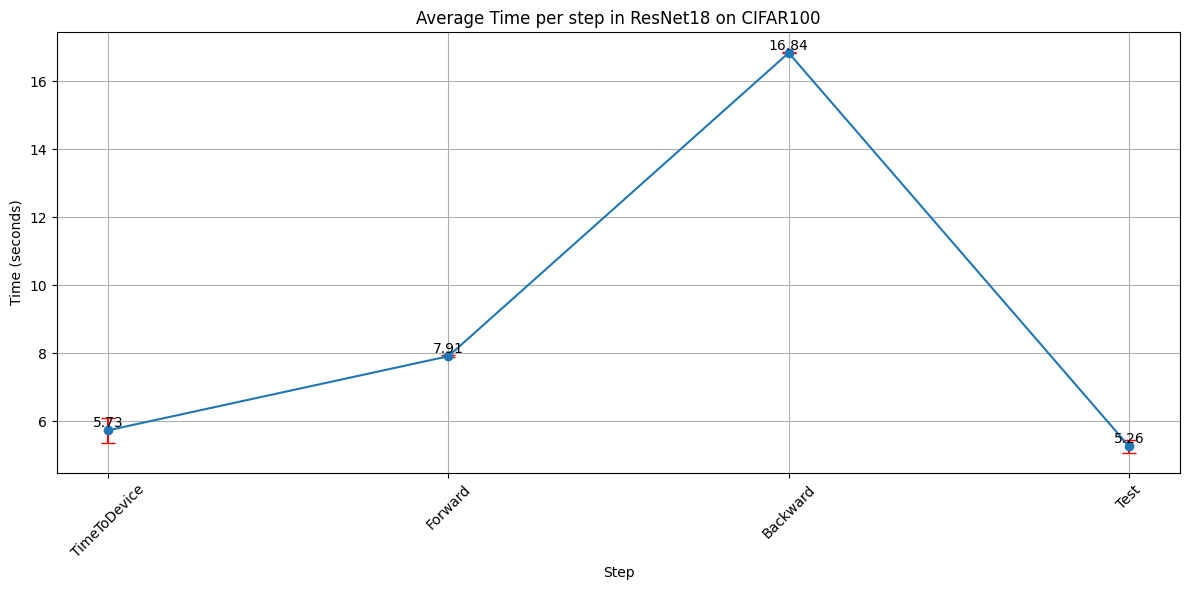

In [83]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per step in ResNet18 on CIFAR100')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [84]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
stdEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [85]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    # calculate the standard deviation
    stdEpochEnergy_epoch_f = np.std(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    stdEpochEnergy_epoch_f = np.round(stdEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
    stdEpochEnergy_f[0,i] = stdEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')
print(f'The standard deviation of energy per epoch is: {stdEpochEnergy_f}')

The total energy per epoch is: [[ 9766.88 10086.72 10259.92 10107.26 10336.02 10174.32 10305.04 10244.84
  10085.03 10336.97 10222.14 10336.8  10236.95 10055.33 10286.58 10140.22
  10243.43 10224.02 10340.91 10251.28]]
The average energy per epoch is: [[244.17 258.63 250.24 259.16 258.4  260.88 257.63 256.12 258.59 258.42
  255.55 258.42 255.92 257.83 257.16 260.01 256.09 255.6  252.22 262.85]]
The standard deviation of energy per epoch is: [[54.51 29.87 25.71 30.59 34.35 28.31 31.26 32.11 33.   31.8  31.38 30.35
  30.61 33.47 32.22 30.5  31.63 27.93 28.84 27.41]]


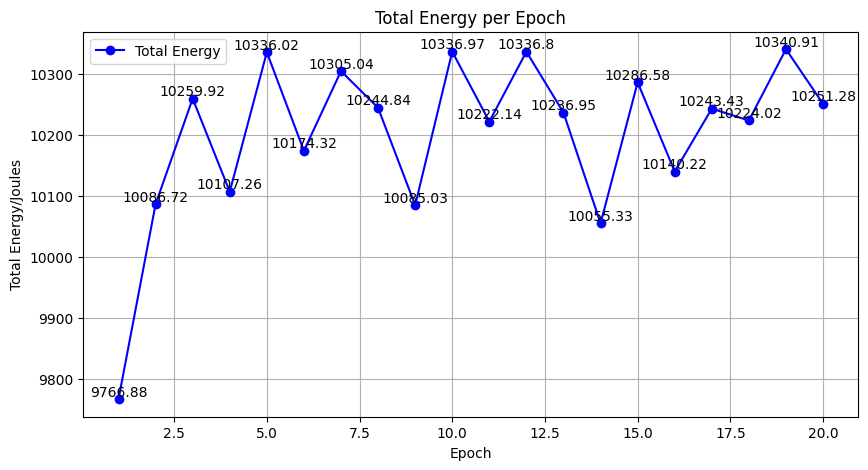

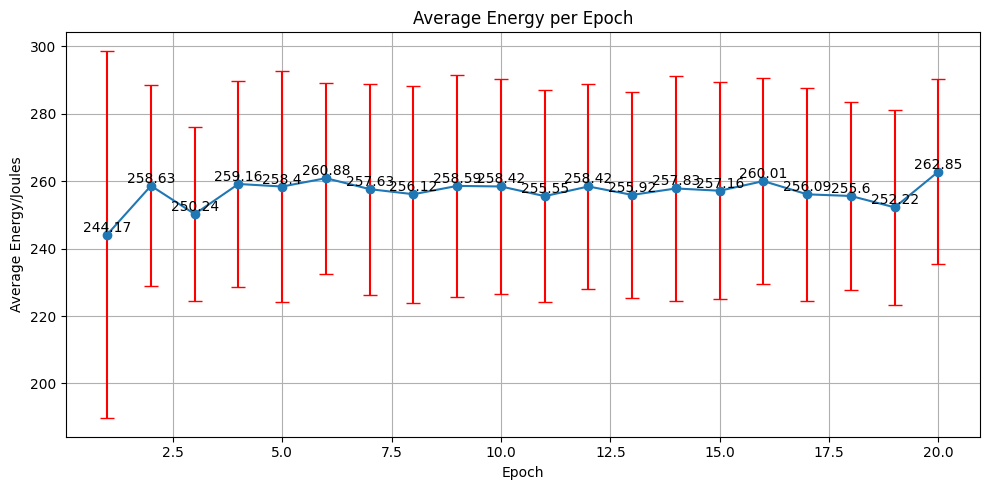

In [86]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch as well as the standard deviation
plt.figure(figsize=(10, 5))
plt.errorbar(epoch_list, avgEpochEnergy_f.reshape(-1,), yerr=stdEpochEnergy_f.reshape(-1,), fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.tight_layout()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [87]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 10202.033, the standard deviation is: 133.08546585183535


In [88]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 256.69450000000006, the standard deviation is: 3.9586076782121284


##### cifar100 

In [89]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [90]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[9345.21 9343.3  9436.4  9367.33 9642.02 9492.32 9383.7  9527.79 9480.48
  9545.48 9596.81 9531.03 9768.62 9593.31 9701.33 9650.52 9440.25 9456.7
  9633.91 9579.39]]
The average energy per epoch is: [[203.16 212.35 214.46 212.89 214.27 210.94 218.23 211.73 210.68 212.12
  208.63 216.61 203.51 208.55 206.41 209.79 205.22 210.15 209.43 208.25]]


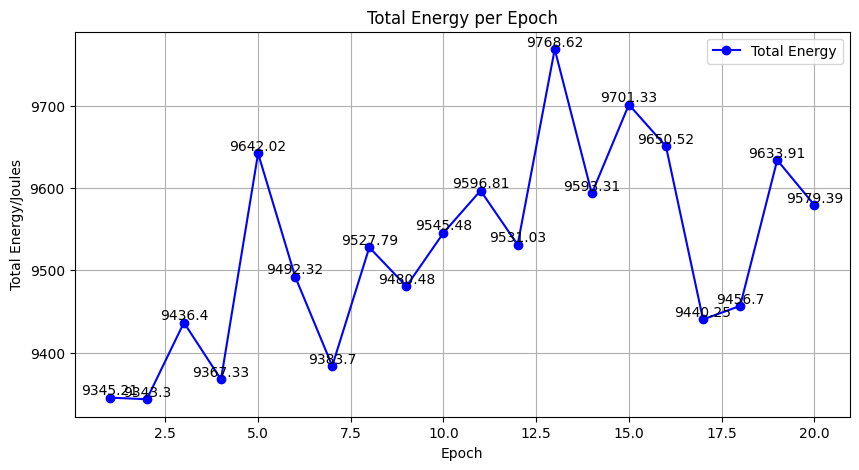

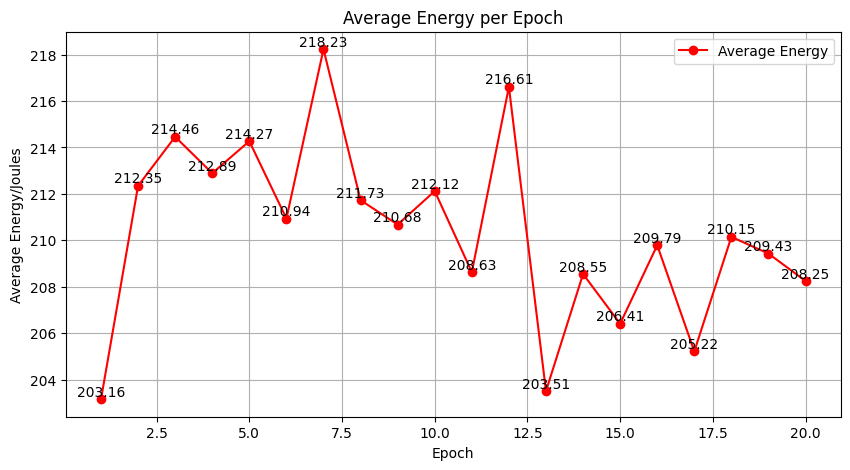

In [91]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

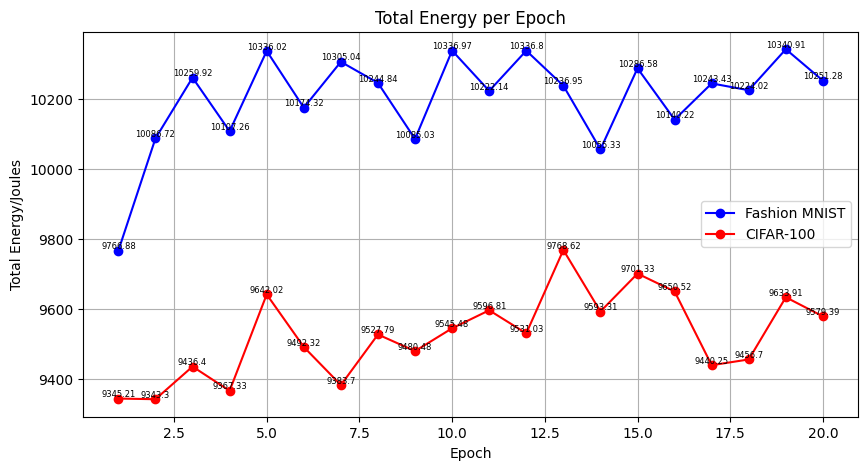

In [92]:
# plot total energy per epoch of two datasets
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Fashion MNIST')
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='CIFAR-100')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point, with smaller font size
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], np.round(totalEpochEnergy_f[0,i], 2), ha='center', va='bottom', fontsize=6)
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom', fontsize=6)
plt.show()

#### EpochTime

##### fashionMNIST

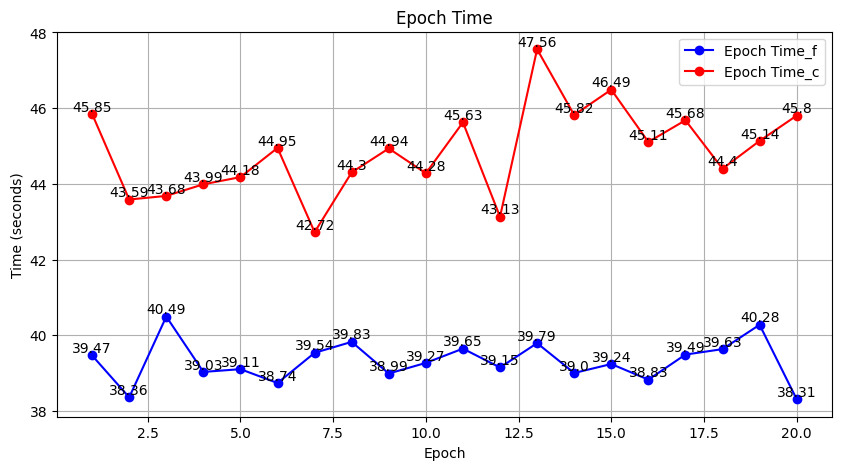

In [93]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [94]:
EpochTime_f

array([39.4665134 , 38.36052585, 40.49462795, 39.03278446, 39.1054101 ,
       38.73925352, 39.53722072, 39.82673001, 38.99028301, 39.27095246,
       39.64784026, 39.14968324, 39.79242277, 39.00423646, 39.24142528,
       38.82820368, 39.49089146, 39.63436723, 40.27758646, 38.31137347])

##### cifar100

In [95]:
EpochTime_c

array([45.84593487, 43.58715916, 43.68288136, 43.98918796, 44.17905259,
       44.95040917, 42.7244029 , 44.3043468 , 44.93612504, 44.28063107,
       45.62587833, 43.13118339, 47.55767965, 45.82040644, 46.48972225,
       45.10724568, 45.68112659, 44.4016037 , 45.13579798, 45.804286  ])

#### average energy consumption per step

##### fashionmnist

In [108]:
# calculate the average energy consumption per step in each epoch, and get the round value
EnergyConsumpStep_f = np.round(TrainPartTime_f * avgEpochEnergy_f, 2)
print(f'The shape of the EnergyConsumpStep_f is {EnergyConsumpStep_f.shape}')

The shape of the EnergyConsumpStep_f is (4, 20)


In [109]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_f = np.mean(EnergyConsumpStep_f, axis=1)
EnergyConsumpStepStd_f = np.std(EnergyConsumpStep_f, axis=1)

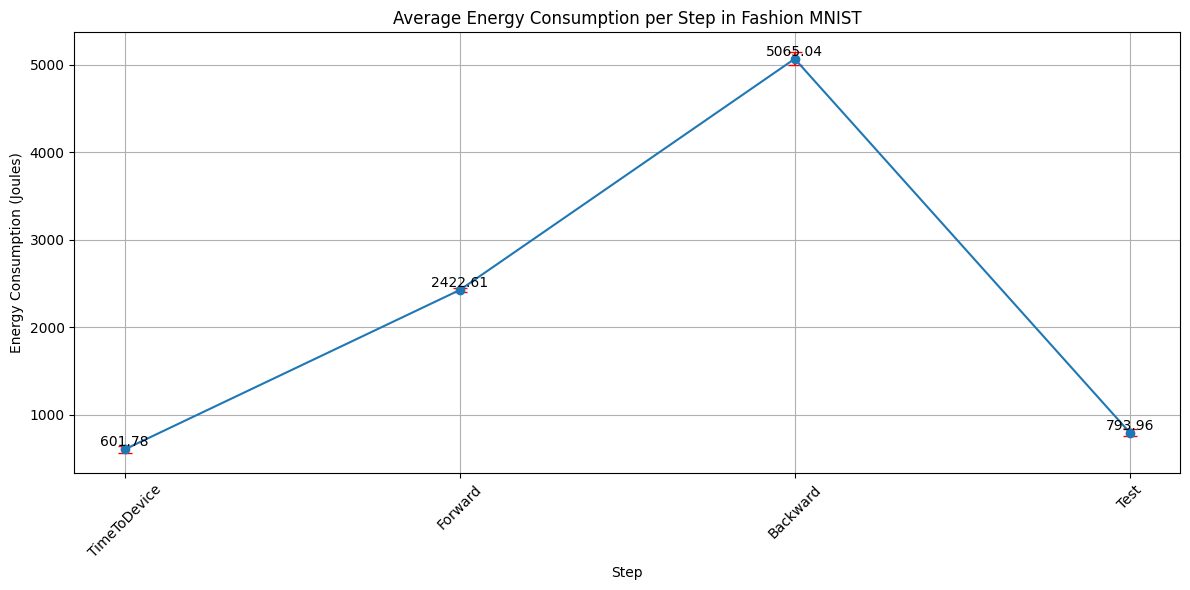

In [110]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_f, yerr=EnergyConsumpStepStd_f, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in Fashion MNIST')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_f[i], np.round(EnergyConsumpStepMean_f[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

In [111]:
EnergyConsumpStep_c = np.round(TrainPartTime_c * avgEpochEnergy_c, 2)

In [112]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_c = np.mean(EnergyConsumpStep_c, axis=1)
EnergyConsumpStepStd_c = np.std(EnergyConsumpStep_c, axis=1)

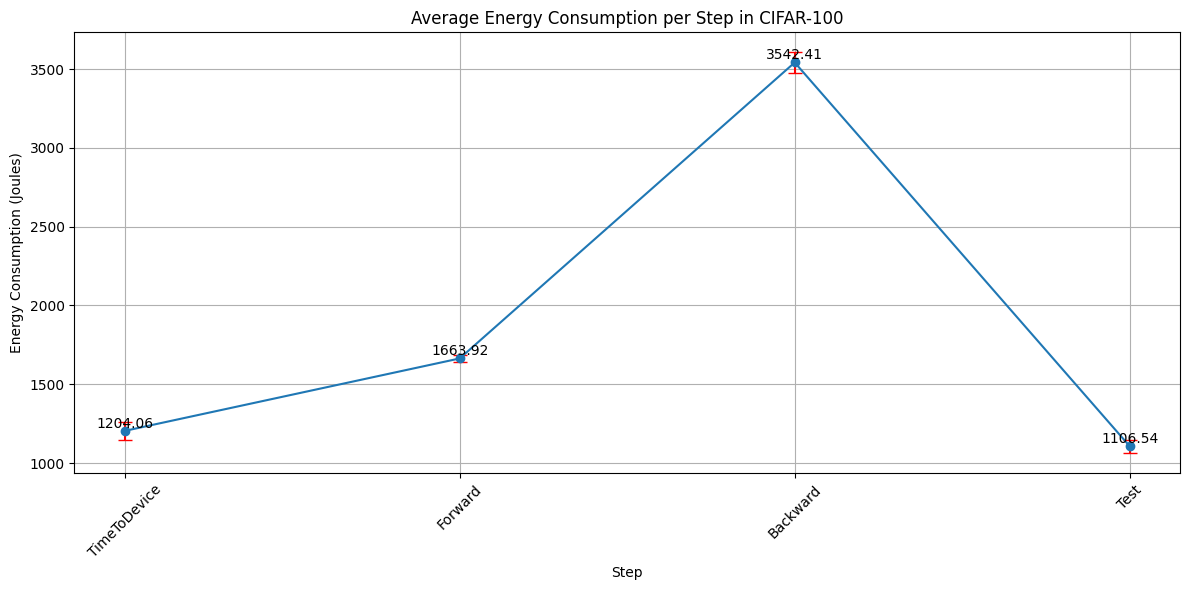

In [113]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_c, yerr=EnergyConsumpStepStd_c, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in CIFAR-100')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_c[i], np.round(EnergyConsumpStepMean_c[i], 2), ha='center', va='bottom')
plt.show()